<p align="center">
  <img src="https://github.com/VictorGuevaraP/IA-DS_RESEARCH/blob/master/URPalma-1.png?raw=true" alt="GitHub Image" width="500px">
</p>

**MAESTRÍA CIENCIA DE LOS DATOS** \
**Curso:** Redes enuronales en los negocios \
**Proyecto:** Computer vision \
**Docente:** Víctor Manuel Guevara Ponce \
**Integrantes:** Julber Neira Marín, Alvaro Yporre Alejos y Wuendy Rocío Salcedo

*Nombre del proyecto:**  \
# Aplicación de inteligencia artificial en la automatización de grúas y vehículos para la gestión de contenedores en terminales portuarios

#**Paso 1: Auto Etiquetado CVAT AI**


# 1.1. Instalación de YOLOv8

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Access Google Drive Folder
import os
os.chdir("gdrive/MyDrive")

In [ ]:
%cd /content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario

/content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario


In [ ]:
# Create YOLOv8 root folder
!mkdir yolov8-pseudolabeling

In [ ]:
# Go to YOLOv8 root folder
%cd yolov8-pseudolabeling

/content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/yolov8-pseudolabeling


In [ ]:
# Install YOLOv8
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


<div>
  <img src="https://www.stunningvisionai.com/course/yolov8-architecture.png" height="750"/>
</div>

# 1.2. Preparar el dataset

In [ ]:
#!mkdir Fotogramas

In [ ]:
# Go to data folder
%cd Fotogramas

/content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas


In [ ]:
# Unificamos carpeta y seleccion de muestra
import shutil
import random

main_dir = "/content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas"
unified_dir = os.path.join(main_dir, "unified_frames")
sample_dir = os.path.join(main_dir, "container_sample")

# Crear carpetas
os.makedirs(unified_dir, exist_ok=True)
os.makedirs(sample_dir, exist_ok=True)

# Lista para almacenar todos los archivos unificados
all_files = []

# Unificar archivos primero
for member in ['alvaro', 'julver', 'wuendy']:
    member_dir = os.path.join(main_dir, member)
    if os.path.exists(member_dir):
        print(f"Procesando carpeta de {member}...")
        for file in os.listdir(member_dir):
            if file.endswith('.jpg'):
                new_name = f"{member}_{file}"
                source_path = os.path.join(member_dir, file)
                dest_path = os.path.join(unified_dir, new_name)
                shutil.copy2(source_path, dest_path)
                all_files.append(new_name)

# Seleccionar % aleatorio
sample_size = int(len(all_files) * 0.05)
selected_files = random.sample(all_files, sample_size)

# Copiar archivos seleccionados
for file in selected_files:
    source_path = os.path.join(unified_dir, file)
    dest_path = os.path.join(sample_dir, file)
    shutil.copy2(source_path, dest_path)
    print(f"Seleccionado para muestra: {file}")

print("\nProceso completado!")
print(f"Total de archivos: {len(all_files)}")
print(f"Archivos seleccionados: {sample_size}")
print(f"Muestra del 5% en: {sample_dir}")

Procesando carpeta de alvaro...
Procesando carpeta de julver...
Procesando carpeta de wuendy...
Seleccionado para muestra: wuendy_frame_0003.jpg
Seleccionado para muestra: julver_frame_0044.jpg
Seleccionado para muestra: wuendy_frame_0048.jpg
Seleccionado para muestra: wuendy_frame_0063.jpg
Seleccionado para muestra: alvaro_frame_0054.jpg
Seleccionado para muestra: alvaro_frame_0067.jpg
Seleccionado para muestra: alvaro_frame_0014.jpg
Seleccionado para muestra: julver_frame_0041.jpg
Seleccionado para muestra: alvaro_frame_0026.jpg
Seleccionado para muestra: julver_frame_0016.jpg

Proceso completado!
Total de archivos: 204
Archivos seleccionados: 10
Muestra del 5% en: /content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas/sample_10percent


## 1.3. Subir el dataset y anotación

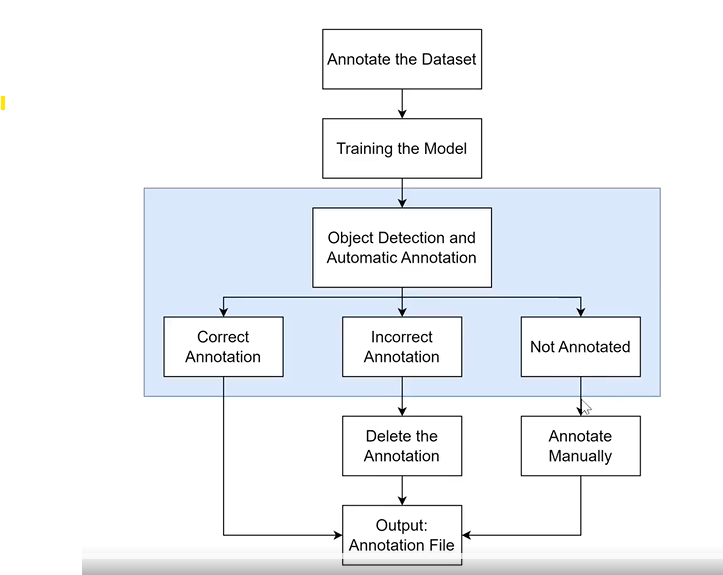

In [ ]:
%ls

alvaro/            container_sample_annotation.zip  container_sample.zip  split_dataset.py  wuendy/
container_sample/  container_sample.yaml            julver/               unified_frames/


In [ ]:
# Descomprimir anotación
!unzip -j container_sample_annotation.zip "obj_train_data/container_sample/*" -d "container_sample"

Archive:  container_sample_annotation.zip
caution: filename not matched:  obj_train_data/container_sample/*


In [ ]:
!ls container_sample

alvaro_frame_0014.jpg  alvaro_frame_0054.txt  julver_frame_0041.jpg  wuendy_frame_0003.txt
alvaro_frame_0014.txt  alvaro_frame_0067.jpg  julver_frame_0041.txt  wuendy_frame_0048.jpg
alvaro_frame_0026.jpg  alvaro_frame_0067.txt  julver_frame_0044.jpg  wuendy_frame_0048.txt
alvaro_frame_0026.txt  julver_frame_0016.jpg  julver_frame_0044.txt  wuendy_frame_0063.jpg
alvaro_frame_0054.jpg  julver_frame_0016.txt  wuendy_frame_0003.jpg  wuendy_frame_0063.txt


## 1.4. Dividir el dataset

In [ ]:
!pwd

/content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas


In [ ]:
# Download the python code
!gdown https://drive.google.com/uc?id=1KFhEacb7ec6Hh5tLCaKY1lqElJwb7gjB

Downloading...
From (original): https://drive.google.com/uc?id=1KFhEacb7ec6Hh5tLCaKY1lqElJwb7gjB
From (redirected): https://drive.google.com/uc?id=1KFhEacb7ec6Hh5tLCaKY1lqElJwb7gjB&confirm=t&uuid=74a24bf1-130a-4f2c-8acb-a60dba4fe405
To: /content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas/split_dataset.py
100% 3.73k/3.73k [00:00<00:00, 17.3MB/s]


In [ ]:
%ls

Fotogramas/  runs/  yolo11n.pt  yolov8n.pt  yolov8-pseudolabeling/


In [ ]:
# Split the dataset
!python split_dataset.py --train 60 --validation 20 --test 20 --folder container_sample --dest container_sample_dataset

## Data file

In [ ]:
# Download the data file
!gdown https://drive.google.com/uc?id=1EzCVqVkDW_eTcF5r9odEKptMmqquThdg

In [ ]:
# Rename the data file
!mv data.yaml container_sample.yaml

In [ ]:
# Get Absolute Path
import os
print(os.getcwd())

/content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas


In [ ]:
# Back to the root folder
%cd ../

/content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario


# 1.5. Entrenamiento

In [ ]:
# Training
!yolo detect train model=yolov8n.pt data=Fotogramas/container_sample.yaml workers=2 batch=2 device=0 epochs=50 patience=20 name=yolov8_container_sample

100% 6.25M/6.25M [00:00<00:00, 85.6MB/s]
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=Fotogramas/container_sample.yaml, epochs=50, time=None, patience=20, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=None, name=yolov8_container_sample, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

# 1.6. Detection

Detección del objeto

In [ ]:
# Object Detection
!yolo detect predict model=runs/detect/yolov8_container_sample/weights/best.pt source=Fotogramas/unified_frames save_txt=True

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/204 /content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas/unified_frames/alvaro_frame_0000.jpg: 384x640 1 container_blue, 67.2ms
image 2/204 /content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas/unified_frames/alvaro_frame_0001.jpg: 384x640 1 container_blue, 7.5ms
image 3/204 /content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas/unified_frames/alvaro_frame_0002.jpg: 384x640 1 container_blue, 15.7ms
image 4/204 /content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas/unified_frames/alvaro_frame_0003.jpg: 384x640 1 container_blue, 24.0ms
image 5/204 /content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas/unified_frames/alvaro_frame_0004.jpg: 384x640 1 container_blue, 19.0ms
image 6/204 /content/gdrive/MyDrive/00_REDES_NEURONA

## 1.7. Convertir anotacion a tipo de formato "CVAT"

In [ ]:
!gdown https://drive.google.com/uc?id=12qjKCdaXnPhrMROJDofWhjha8Ybvg88w

Downloading...
From (original): https://drive.google.com/uc?id=12qjKCdaXnPhrMROJDofWhjha8Ybvg88w
From (redirected): https://drive.google.com/uc?id=12qjKCdaXnPhrMROJDofWhjha8Ybvg88w&confirm=t&uuid=67de44b3-297c-4ff8-8619-27976fd3611f
To: /content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/cvat_yolo.py
100% 4.36k/4.36k [00:00<00:00, 19.7MB/s]


In [ ]:
!python cvat_yolo.py --annotation_folder runs/detect/predict/labels --data Fotogramas/container_sample.yaml --name unified_frames --images_folder Fotogramas/unified_frames


The zip file is saved in: cvat_yolo/unified_frames/unified_frames_annotation.zip


In [ ]:
# Download the result
from google.colab import files

files.download('cvat_yolo/unified_frames/unified_frames_annotation.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 1.8. Entrenamiento con todas las imágenes

In [ ]:
# Go to data folder
%cd Fotogramas

/content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas


## 1.9. Subir las anotaciones

In [1]:
# Descomprimir anotaciones
!unzip -j container_all.zip "obj_train_data/unified_frames/*" -d "unified_frames"

unzip:  cannot find or open container_all.zip, container_all.zip.zip or container_all.zip.ZIP.


In [ ]:
!pwd

/content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas


In [ ]:
!ls unified_frames

alvaro_frame_0000.jpg  alvaro_frame_0051.jpg  julver_frame_0033.jpg  wuendy_frame_0015.jpg
alvaro_frame_0000.txt  alvaro_frame_0051.txt  julver_frame_0033.txt  wuendy_frame_0015.txt
alvaro_frame_0001.jpg  alvaro_frame_0052.jpg  julver_frame_0034.jpg  wuendy_frame_0016.jpg
alvaro_frame_0001.txt  alvaro_frame_0052.txt  julver_frame_0034.txt  wuendy_frame_0016.txt
alvaro_frame_0002.jpg  alvaro_frame_0053.jpg  julver_frame_0035.jpg  wuendy_frame_0017.jpg
alvaro_frame_0002.txt  alvaro_frame_0053.txt  julver_frame_0035.txt  wuendy_frame_0017.txt
alvaro_frame_0003.jpg  alvaro_frame_0054.jpg  julver_frame_0036.jpg  wuendy_frame_0018.jpg
alvaro_frame_0003.txt  alvaro_frame_0054.txt  julver_frame_0036.txt  wuendy_frame_0018.txt
alvaro_frame_0004.jpg  alvaro_frame_0055.jpg  julver_frame_0037.jpg  wuendy_frame_0019.jpg
alvaro_frame_0004.txt  alvaro_frame_0055.txt  julver_frame_0037.txt  wuendy_frame_0019.txt
alvaro_frame_0005.jpg  alvaro_frame_0056.jpg  julver_frame_0038.jpg  wuendy_frame_0020.jpg

## 1.9. Dividir dataset

In [ ]:
!ls

alvaro		    container_sample_annotation.zip  julver		     wuendy
container_all.yaml  container_sample_dataset	     split_dataset.py
container_all.zip   container_sample.yaml	     unified_frames
container_sample    container_sample.zip	     unified_frames_dataset


In [ ]:
# Split the dataset
!python split_dataset.py --train 80 --validation 10 --test 10 --folder unified_frames --dest unified_frames_dataset

## 1.10. Archivos de la data

In [ ]:
# Copy the data file
!cp container_sample.yaml container_all.yaml

In [ ]:
# Go Back to the root folder
%cd ../

/content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario


## 1.11. Entrenamiento

In [ ]:
!yolo detect train model=yolov8n.pt data=Fotogramas/container_all.yaml workers=2 batch=12 device=0 epochs=100 patience=50 name=yolov8_container_all

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=Fotogramas/container_all.yaml, epochs=100, time=None, patience=50, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=None, name=yolov8_container_all, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

# 1.12. mAP

In [ ]:
# YOLOv8 Model (All Images Road Sign Dataset)
!yolo detect val model=runs/detect/yolov8_container_all/weights/best.pt data=Fotogramas/container_all.yaml iou=0.5 name=yolov8_container_all_val

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/gdrive/MyDrive/00_REDES_NEURONALES/Terminar_Portuario/Fotogramas/unified_frames_dataset/labels/val.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.42it/s]
                   all         20         20      0.986          1      0.995      0.988
         container_red          2          2      0.975          1      0.995      0.995
        container_blue         18         18      0.997          1      0.995       0.98
Speed: 0.2ms preprocess, 16.3ms inference, 0.0ms loss, 42.7ms postprocess per image
Results saved to runs/detect/yolov8_container_all_val
💡 Learn more at https://docs.ultralytics.com/modes/val


# 1.13. DESPLIEGE

In [ ]:
#Funciones Parte 1

import cv2
import random
import time
import argparse
import os
from ultralytics import YOLO

def get_name(file_path):
  name_idx = 0
  file_pos = (file_path).rfind('\\')

  if(file_pos == -1):
      file_pos = (file_path).rfind('/')

      if(file_pos == -1):
          file_pos = 0

  name_idx = file_pos + 1

  name = file_path[name_idx:]

  return name

def get_save_path(file_name, folder_name):
  path = "result"
  save_path = os.path.join(path, folder_name)

  exists = os.path.exists(save_path)

  if(not exists):
      os.makedirs(save_path)

  save_path = os.path.join(save_path, file_name)

  return save_path

def draw_box(img, result, class_list, colors, label_size) :
  # Get information from result
  xyxy = result.boxes.xyxy.numpy()
  confidence = result.boxes.conf.numpy()
  class_id = result.boxes.cls.numpy().astype(int)
  # Pack together for easy use
  sum_output = list(zip(class_id, confidence, xyxy))
  # Copy image, in case that we need original image for something
  out_image = img.copy()

  for run_output in sum_output :
    # Unpack
    label, con, box = run_output
    # Choose color
    box_color = colors[int(label)]
    text_color = (255,255,255)
    # Get Class Name
    label = class_list[int(label)]
    # Draw object box
    first_half_box = (int(box[0]),int(box[1]))
    second_half_box = (int(box[2]),int(box[3]))
    cv2.rectangle(out_image, first_half_box, second_half_box, box_color, 2)
    # Create text
    text_print = '{label} {con:.2f}'.format(label = label, con = con)
    # Locate text position
    text_location = (int(box[0]), int(box[1] - 10 ))
    # Get size and baseline
    labelSize, baseLine = cv2.getTextSize(text_print, cv2.FONT_HERSHEY_SIMPLEX, label_size, 1)

    # Draw text's background
    cv2.rectangle(out_image
                    , (int(box[0]), int(box[1] - labelSize[1] - 10 ))
                    , (int(box[0])+labelSize[0], int(box[1] + baseLine-10))
                    , box_color , cv2.FILLED)
    # Put text
    cv2.putText(out_image, text_print ,text_location
                , cv2.FONT_HERSHEY_SIMPLEX , label_size
                , text_color, 2, cv2.LINE_AA)

  return out_image

def draw_fps(avg_fps, combined_img):
  avg_fps_str = float("{:.2f}".format(avg_fps))

  cv2.rectangle(combined_img, (10,2), (280,50), (255,255,255), -1)
  cv2.putText(combined_img, "FPS: "+str(avg_fps_str), (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0), thickness=3)

  return combined_img

In [ ]:
#Funciones Parte 2

def detection(source, model, folder_name, img_size, label_size=1):
  # Initialize video
  cap = cv2.VideoCapture(source)

  # Initialize YOLOv8 model
  model_path = model
  yolov8_detector = YOLO(model_path)

  # Class Name and Colors
  label_map = yolov8_detector.names
  COLORS = [[random.randint(0, 255) for _ in range(3)] for _ in label_map]

  # FPS Detection
  frame_count = 0
  total_fps = 0
  avg_fps = 0

  # FPS Video
  total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frame_width = int(cap.get(3))
  frame_height = int(cap.get(4))

  video_frames = []

  # Iniciar medición de tiempo
  start_time = time.time()

  while cap.isOpened():
    # Removed: if cv2.waitKey(1) == ord('q'):
    #         break

    try:
        # Read frame from the video
        ret, frame = cap.read()
        if not ret:
            break
    except Exception as e:
        print(e)
        continue

    # # Start Time
    start = time.time()
    # Update object localizer
    results = yolov8_detector.predict(frame, imgsz=img_size, verbose=False)
    result = results[0].cpu()

    # Draw Detection Results
    combined_img = draw_box(frame, result, label_map, COLORS, label_size)

    end = time.time()
    # # End Time

    # Draw FPS
    frame_count += 1
    fps = 1 / (end - start)
    total_fps = total_fps + fps
    avg_fps = total_fps / frame_count

    combined_img = draw_fps(avg_fps, combined_img)

    # Append frame to array
    video_frames.append(combined_img)

    #
    print("(%2d / %2d) Frames Processed" % (frame_count, total_frames))

  end_time = time.time()
  total_time = end_time - start_time
  print(f"\nTime taken to process video: {total_time:.2f} seconds")

  print("\nCreate a Video:")

  # Get a file name
  file_name = get_name(source)
  # Get Save Path
  save_path = get_save_path(file_name, folder_name)
  # Create VideoWriter object.
  out = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'XVID'), int(avg_fps), (frame_width, frame_height))

  for frame in video_frames:
    out.write(frame)

  out.release()

  print("Video is saved in: "+save_path)

In [ ]:
# Ejecucion
detection("contenedor_AZUL.mp4", "runs/detect/yolov8_container_all/weights/best.pt", "yolov8n-containers", 640)

( 1 / 686) Frames Processed
( 2 / 686) Frames Processed
( 3 / 686) Frames Processed
( 4 / 686) Frames Processed
( 5 / 686) Frames Processed
( 6 / 686) Frames Processed
( 7 / 686) Frames Processed
( 8 / 686) Frames Processed
( 9 / 686) Frames Processed
(10 / 686) Frames Processed
(11 / 686) Frames Processed
(12 / 686) Frames Processed
(13 / 686) Frames Processed
(14 / 686) Frames Processed
(15 / 686) Frames Processed
(16 / 686) Frames Processed
(17 / 686) Frames Processed
(18 / 686) Frames Processed
(19 / 686) Frames Processed
(20 / 686) Frames Processed
(21 / 686) Frames Processed
(22 / 686) Frames Processed
(23 / 686) Frames Processed
(24 / 686) Frames Processed
(25 / 686) Frames Processed
(26 / 686) Frames Processed
(27 / 686) Frames Processed
(28 / 686) Frames Processed
(29 / 686) Frames Processed
(30 / 686) Frames Processed
(31 / 686) Frames Processed
(32 / 686) Frames Processed
(33 / 686) Frames Processed
(34 / 686) Frames Processed
(35 / 686) Frames Processed
(36 / 686) Frames Pr

# 1.14. Visualizacion

In [ ]:
# Instalar ffmpeg
!apt-get install -y ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

In [ ]:
def compress_video(input_file, output_file, crf=28, preset='medium'):
    """
    Compress the video using ffmpeg.

    Parameters:
        input_file (str): Path to the input video file.
        output_file (str): Path to save the compressed video.
        crf (int): Constant Rate Factor, lower values mean better quality but larger file size (default 28).
        preset (str): Preset for compression speed and efficiency (default 'medium').
    """
    command = f'ffmpeg -i {input_file} -vcodec libx264 -crf {crf} -preset {preset} {output_file}'
    os.system(command)

# Ejemplo de uso
input_video_path = "result/yolov8n-containers/ontenedor_AZUL.mp4"  # Ruta al video original
output_video_path5 = "result/yolov8n-containers/compressed.mp4"  # Ruta donde se guardará el video comprimido

compress_video(input_video_path, output_video_path5)

In [ ]:
# Mostrar video
mp4 = open(output_video_path5,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1200 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)